# Homework set 3

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 20, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Zijian Zhang, 14851598

Lina Xiang, 14764369

Run the following cell to import NumPy and Pyplot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

In this exercise you will study the accuracy of several methods for computing the QR decomposition. You are asked to implement these methods yourself. (However, when testing your implementation you may compare with an external implementation.)


## (a) 
Implement the classical and modified Gram-Schmidt procedures for computing the QR decomposition.

Include a short documentation using triple quotes: describe at least the input and the output, and whether the code modifies the input matrix.


In [2]:
def classical_gram_schmidt(A):
    """
    Classical Gram-Schmidt procedure for QR decomposition.

    Parameters:
    A (numpy.ndarray): The input matrix to be decomposed. It should be a 2D array.

    Returns:
    Q (numpy.ndarray): Orthogonal matrix.
    R (numpy.ndarray): Upper triangular matrix.
    """
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for i in range(n):
        Q[:, i] = A[:, i]
        for j in range(i):
            R[j, i] = np.dot(Q[:, j], A[:, i])
            Q[:, i] -= R[j, i] * Q[:, j]
        R[i, i] = np.linalg.norm(Q[:, i])
        Q[:, i] /= R[i, i]

    return Q, R

def modified_gram_schmidt(A): 
    """
    Modified Gram-Schmidt procedure for QR decomposition.

    Parameters:
    A (numpy.ndarray): The input matrix to be decomposed. It should be a 2D array.

    Returns:
    Q (numpy.ndarray): Orthogonal matrix.
    R (numpy.ndarray): Upper triangular matrix.

    Note:
    This function does not modify the input matrix A.
    """
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for k in range(n):
        R[k, k] = np.linalg.norm(A[:, k])
        Q[:, k] = A[:, k] / R[k, k]
        for i in range(k + 1, n):
            R[k, i] = np.dot(Q[:, k], A[:, i])
            A[:, i] -= R[k, i] * Q[:, k]

    return Q, R


## (b) (a+b 3.5 pts)
Let $H$ be a Hilbert matrix of size $n$ (see Computer Problem 2.6). Study the quality of the QR decompositions obtained using the two methods of part (a), specifically the loss of orthogonality. In order to do so, plot the quantity $\| I - Q^T Q \|$ as a function of $n$ on a log scale. Vary $n$ from $2$ to $12$.



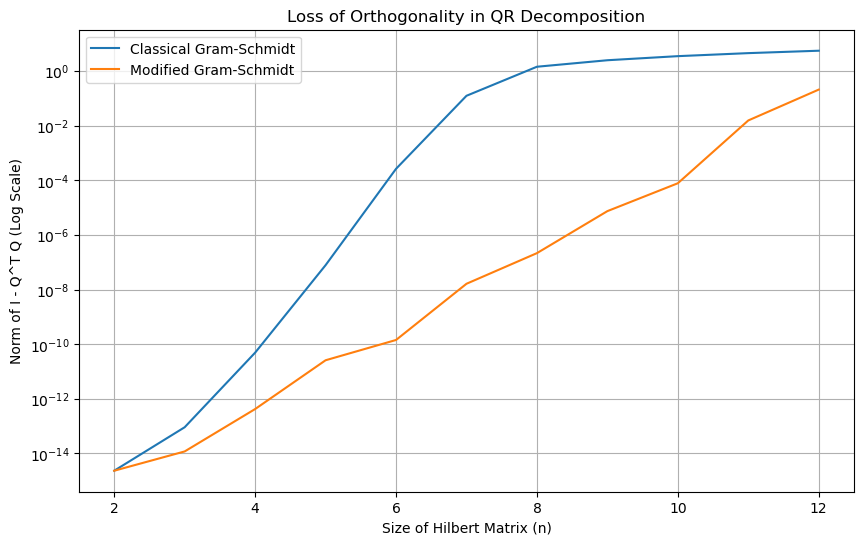

In [3]:
def hilbert_matrix(n):
    """Generate an n x n Hilbert matrix."""
    return np.array([[1 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)])

def norm_diff(Q):
    """Calculate the norm of I - Q^T Q."""
    I = np.eye(Q.shape[1])
    return np.linalg.norm(I - np.dot(Q.T, Q))

# Initialize lists to store the norms for each n
norms_classical = []
norms_modified = []

# Vary n from 2 to 12
for n in range(2, 13):
    H = hilbert_matrix(n)

    # Classical Gram-Schmidt
    Q_classical, _ = classical_gram_schmidt(H)
    norms_classical.append(norm_diff(Q_classical))

    # Modified Gram-Schmidt
    Q_modified, _ = modified_gram_schmidt(H)
    norms_modified.append(norm_diff(Q_modified))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.semilogy(range(2, 13), norms_classical, label='Classical Gram-Schmidt')
plt.semilogy(range(2, 13), norms_modified, label='Modified Gram-Schmidt')
plt.xlabel('Size of Hilbert Matrix (n)')
plt.ylabel('Norm of I - Q^T Q (Log Scale)')
plt.title('Loss of Orthogonality in QR Decomposition')
plt.legend()
plt.grid(True)
plt.show()


We generally expect to see an increasing trend in the loss of orthogonality as the size of the Hilbert matrix increases. This is because Hilbert matrices are known to be ill-conditioned, and their condition worsens with increasing size, leading to more significant numerical errors in the QR decomposition.

The Modified Gram-Schmidt method is typically more numerically stable than the Classical method. Therefore, the plot might show a lower loss of orthogonality for the Modified method compared to the Classical method, especially as the matrix size increases.

A higher value of $\| I - Q^T Q \|$ indicates a greater deviation of $Q$ from perfect orthogonality. In numerical methods, maintaining orthogonality is crucial for the accuracy of subsequent computations, such as solving linear systems or eigenvalue problems.


## (c) (1.5 pts)
Try applying the classical procedure twice. Plot again the loss of orthogonality when computing the QR decomposition of the Hilbert matrix of size $n$ as in (b).


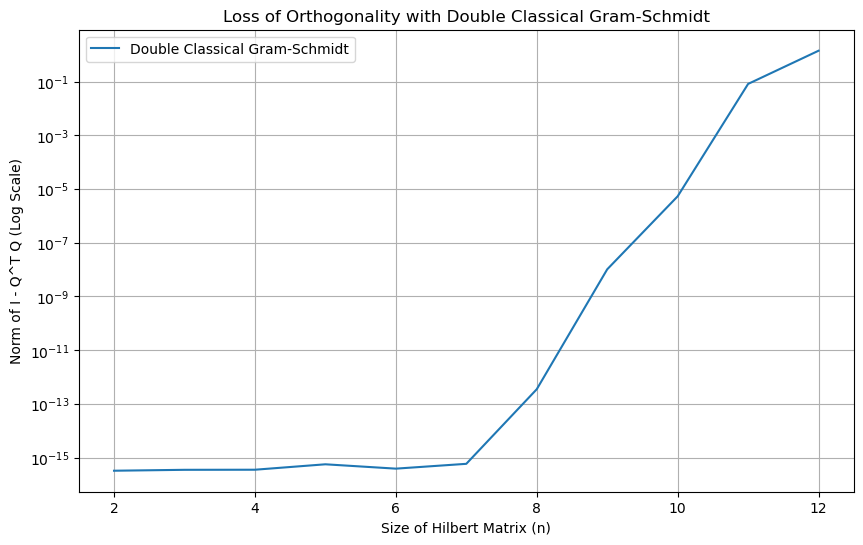

In [4]:

# Initialize list to store the norms for double classical Gram-Schmidt
norms_double_classical = []

# Vary n from 2 to 12
for n in range(2, 13):
    H = hilbert_matrix(n)

    # Double Classical Gram-Schmidt
    Q1, _ = classical_gram_schmidt(H)
    Q2, _ = classical_gram_schmidt(Q1)
    norms_double_classical.append(norm_diff(Q2))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.semilogy(range(2, 13), norms_double_classical, label='Double Classical Gram-Schmidt')
plt.xlabel('Size of Hilbert Matrix (n)')
plt.ylabel('Norm of I - Q^T Q (Log Scale)')
plt.title('Loss of Orthogonality with Double Classical Gram-Schmidt')
plt.legend()
plt.grid(True)
plt.show()


A lower loss of orthogonality in the double application would suggest that re-orthogonalization helps in mitigating the issues of loss of orthogonality. This would be particularly evident for larger matrix sizes where the single application might show significant orthogonality loss.

Since Hilbert matrices are known for their poor conditioning and tendency to induce numerical instability, they serve as a stringent test case. Improvement in orthogonality for these matrices would indicate a robust benefit of the re-orthogonalization approach.

If double application significantly improves orthogonality, it suggests that the classical method, while not inherently stable, can be enhanced for better performance in certain situations.



## (d) (2 pts)
Implement the Householder method for computing the QR decomposition. Remember to include a short documentation.

In [9]:
import numpy as np

def householder_qr(A):
    """
    Compute the QR decomposition of a matrix using the Householder method.

    Parameters:
    A (numpy.ndarray): The input matrix to be decomposed. It should be a 2D array.

    Returns:
    Q (numpy.ndarray): Orthogonal matrix.
    R (numpy.ndarray): Upper triangular matrix.

    Note:
    This function does not modify the input matrix A.
    """
    A = A.astype(np.float64)  # Ensure A is of floating-point type
    m, n = A.shape
    R = A.copy()
    Q = np.eye(m)

    for k in range(n - (m == n)):
        # Create the Householder vector
        x = R[k:, k]
        e1 = np.zeros_like(x)
        e1[0] = np.linalg.norm(x) * np.sign(x[0])
        u = x - e1
        v = u / np.linalg.norm(u)

        # Update R and Q
        R[k:, k:] -= 2 * np.outer(v, np.dot(v, R[k:, k:]))
        Q_k = np.eye(m)
        Q_k[k:, k:] -= 2 * np.outer(v, v)
        Q = np.dot(Q, Q_k)

    return Q, R

# Test 
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Q, R = householder_qr(A)


This function computes the QR decomposition of a matrix using the Householder method by taking a single parameter \( A \), which is a 2D NumPy array representing the matrix to be decomposed. It returns two matrices, \( Q \) and \( R \). \( Q \) is an orthogonal matrix, and \( R \) is an upper triangular matrix such that \[ A = QR. \]

The Householder method is more numerically stable than the classical Gram-Schmidt process, especially for matrices with close-to-linearly dependent columns.


## (e) (2 pts)
Perform the analysis of (b) for the Householder method. Discuss the differences between all the methods you have tested so far. Look online and/or in books for information about the accuracy of the different methods and include this in your explanations (with reference).


In [ ]:
# YOUR CODE HERE

Classical Gram-Schmidt: Known for its simplicity but can be numerically unstable, especially with ill-conditioned matrices like Hilbert matrices. This method is prone to loss of orthogonality due to round-off errors.

Modified Gram-Schmidt: An improvement over the classical method in terms of numerical stability. It explicitly reorthogonalizes the vectors, which helps maintain orthogonality but still can suffer from numerical issues with very ill-conditioned matrices.

Householder Method: Generally more stable than both Gram-Schmidt variants. It's particularly effective for ill-conditioned matrices. The Householder method tends to maintain orthogonality better, leading to a smaller \(\| I - Q^T Q \|\) value.
